# Detecting and Analyzing Faces
Computer vision solutions often require an artificial intelligence (AI) solution to be able to detect, analyze, or identify human faces. or example, suppose the retail company Northwind Traders has decided to implement a "smart store", in which AI services monitor the store to identify customers requiring assistance, and direct employees to help them. One way to accomplish this is to perform facial detection and analysis - in other words, determine if there are any faces in the images, and if so analyze their features.

## Use the Face cognitive service to detect faces

Suppose the smart store system that Northwind Traders wants to create needs to be able to detect customers and analyze their facial features. In Microsoft Azure, you can use **Face**, part of Azure Cognitive Services to do this.

### Create a Cognitive Services Resource

Let's start by creating a **Cognitive Services** resource in your Azure subscription.

> **Note**: If you already have a Cognitive Services resource, just open its **Quick start** page in the Azure portal and copy its key and endpoint to the cell below. Otherwise, follow the steps below to create one.

1. In another browser tab, open the Azure portal at https://portal.azure.com, signing in with your Microsoft account.
2. Click the **&#65291;Create a resource** button, search for *Cognitive Services*, and create a **Cognitive Services** resource with the following settings:
    - **Name**: *Enter a unique name*.
    - **Subscription**: *Your Azure subscription*.
    - **Location**: *Choose any available region*:
    - **Pricing tier**: S0
    - **Resource group**: *Create a resource group with a unique name*.
3. Wait for deployment to complete. Then go to your cognitive services resource, and on the **Overview** page, click the link to manage the keys for the service. You will need the endpoint and keys to connect to your cognitive services resource from client applications.

### Get the Key and Endpoint for your Cognitive Services resource

To use your cognitive services resource, client applications need its endpoint and authentication key:

1. In the Azure portal, on the **Keys and Endpoint** page for your cognitive service resource, copy the **Key1** for your resource and paste it in the code below, replacing **YOUR_COG_KEY**.
2. Copy the **endpoint** for your resource and and paste it in the code below, replacing **YOUR_COG_ENDPOINT**.
3. Run the code in the cell below by clicking the Run Cell <span>&#9655</span> button (at the top left of the cell).

In [1]:
cog_key = '72ddc4058d584e08bb26bc89d3ee279a'
cog_endpoint = 'https://davew-cogs.cognitiveservices.azure.com/'


In [2]:
! pip install azure-cognitiveservices-vision-face

Now that you have a Cognitive Services resource and the SDK package installed, you can use the Face service to detect human faces in the store.

Run the code cell below to see an example.

In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from python_code import faces
import os
%matplotlib inline

In [12]:

def detect_faces(file):
    face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))
    image_stream = open(file, "rb")
    detected_faces = face_client.face.detect_with_stream(image=image_stream)
    faces.show_faces(file, detected_faces)


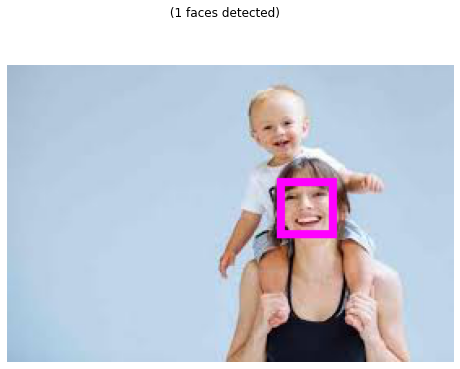

In [13]:
detect_faces("./images/woman.jpg")

Each detected face is assigned a unique ID, so your application can identify each individual face that was detected.

Run the cell below to see the IDs for some more shopper faces.

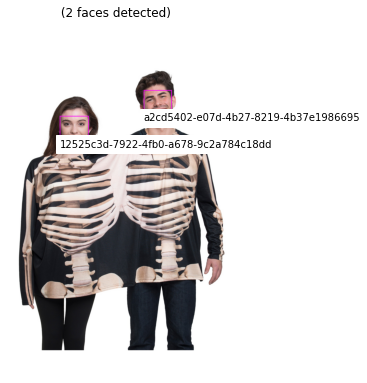

In [20]:
# Open an image
image_path = "./images/22.jpg"
image_stream = open(image_path, "rb")

# Detect faces
detected_faces = face_client.face.detect_with_stream(image=image_stream)

# Display the faces (code in python_code/faces.py)
faces.show_faces(image_path, detected_faces, show_id=True)

## Analyze facial attributes

Face can do much more than simply detect faces. It can also analyze facial features and expressions to suggest age and emotional state; For example, run the code below to analyze the facial attributes of a shopper.

In [21]:
def detect_attribs(file):
    image_stream = open(file, "rb")
    attributes = ['age', 'emotion']
    detected_faces = face_client.face.detect_with_stream(image=image_stream,return_face_attributes=attributes)
    faces.show_face_attributes(file, detected_faces)

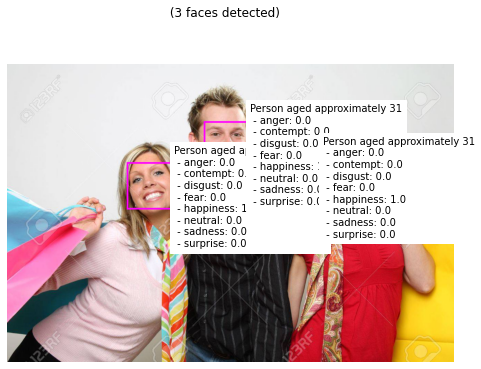

In [24]:
detect_attribs("./images/happy3.jpg")

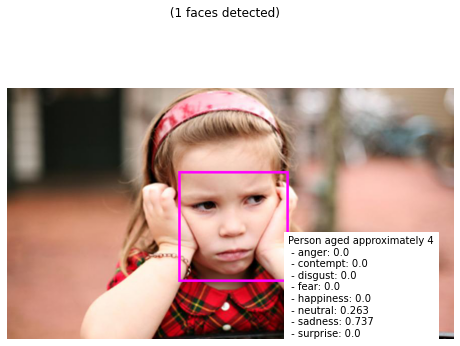

In [25]:
detect_attribs("./images/mad.jpg")

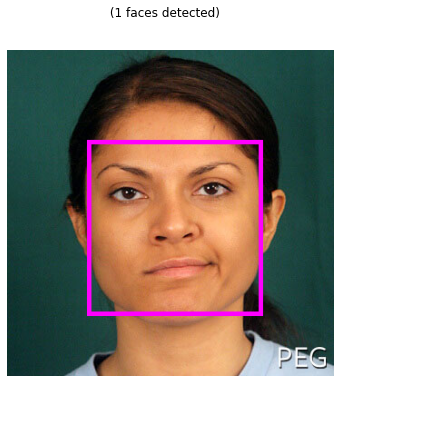

In [26]:
detect_attribs("./images/conte.jpg")


## Find similar faces 

The face IDs that are created for each detected face are used to individually identify face detections. You can use these IDs to compare a detected face to previously detected faces and find faces with similar features.

For example, run the cell below to compare the shopper in one image with shoppers in another, and find a matching face.

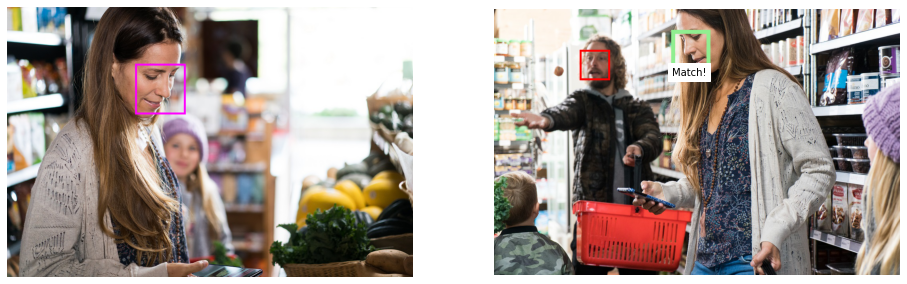

In [8]:
# Get the ID of the first face in image 1
image_1_path = os.path.join('images', 'store_cam3.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# Get the face IDs in a second image
image_2_path = os.path.join('images', 'store_cam2.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# Find faces in image 2 that are similar to the one in image 1
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# Show the face in image 1, and similar faces in image 2(code in python_code/face.py)
faces.show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)